## Visualitzation

### Imports and load data

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

data = arff.loadarff("./data/HTRU2/HTRU_2.arff")
df = pd.DataFrame(data[0])

## Comparing densities of classes

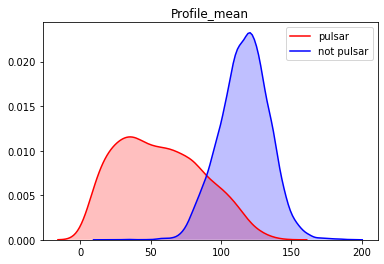

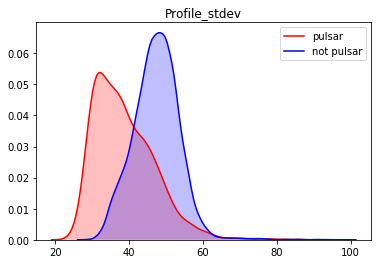

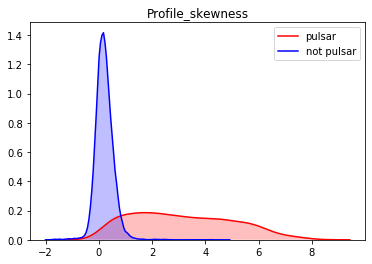

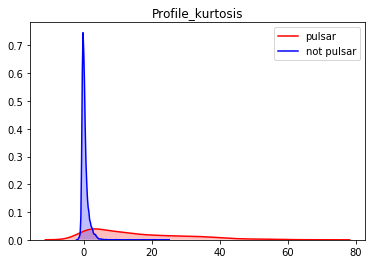

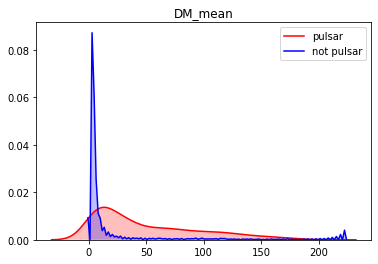

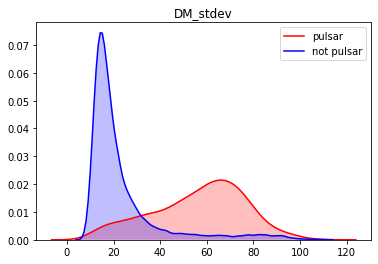

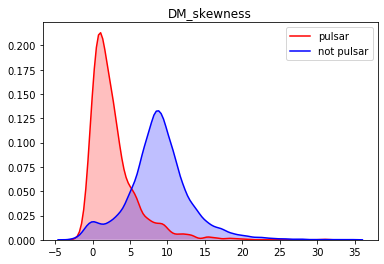

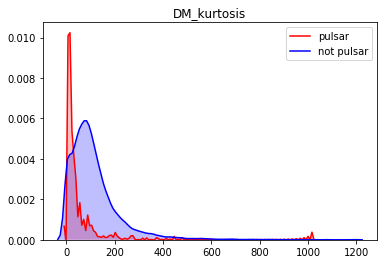

In [47]:
dfPulsar = df.loc[df['class'] == b'1']
dfNotPulsar = df.loc[df['class'] == b'0']

for column in stdDf.columns:
    pulsars = dfPulsar[column]
    notPulsars = dfNotPulsar[column]

    p1=sns.kdeplot(pulsars, shade=True, color="r", label="pulsar")
    p1=sns.kdeplot(notPulsars, shade=True, color="b", label="not pulsar")
    plt.title(column)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d1c73fad0>,
      dtype=object)

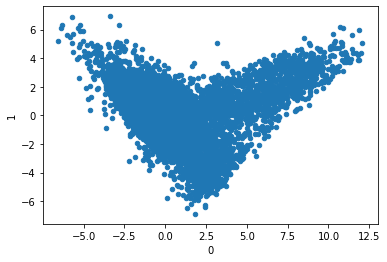

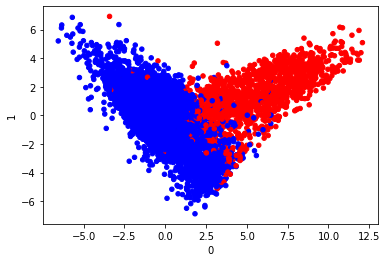

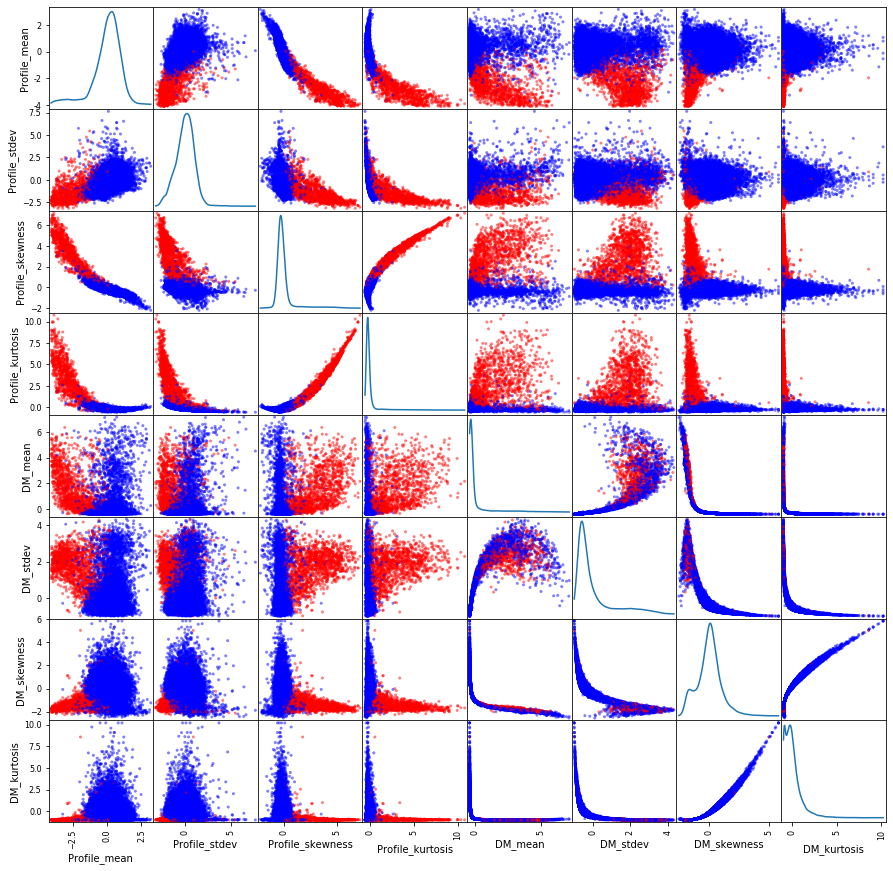

In [78]:
# Standardize data
scaler = StandardScaler()
scaledData = scaler.fit_transform(df.drop(['class'], axis = 1))
stdDf = pd.DataFrame(scaledData, columns = df.columns[:-1])
stdDfWithClass = pd.concat([stdDf, df[['class']]], axis = 1)

# PCA to extract data with 2 components
pca = PCA(n_components = 2)
p = pca.fit_transform(stdDf)
data = pd.DataFrame(p)

# Include class to the dataframe
data = pd.concat([data, df[['class']]], axis = 1)

# Plot data
data.plot.scatter(x = 0, y = 1)

# Plot data with color
col = data['class'].map({b'1':'r', b'0':'b'})
data.plot.scatter(x = 0, y = 1, c = col)

col = stdDfWithClass['class'].map({b'1':'r', b'0':'b'})
pd.plotting.scatter_matrix(stdDf, c=col, figsize=(15,15))

